# The Final Self-defined Project for The IBM Data Science Courses

## Self defined projects details

Basically I will talk about two parts:

1. The project backgrounds;

2. The data I used and will be used (inclusing the data from online and some self generated dataframes or tables);

### Hopefully this will be a very interesting projects!

*****

### 1. Project Background

Since I live in southern California for a while, and always travelling to the northen California, I have found a lot of differences between these two places. Not only from the part of the weather, the landscape, the company types, but also the life styles of peoples. All these factors influence each other dramatically. 

Currently, my identity is still a graduate student. So for this project, I will do something based on the university or colleges. Meawhile, exploring the restaurants in the neighborhood of the universities and try to cluter those restaurant. Hopefully, it will help the incoming students to chose their deam school or find the best place for them to study. 

**A risen question would be that why I select this topic during my studies**

*Based on different location of the universities or the colleges*, I find that the location of the school will stimulate the development of certain fields and sometimes it will also impact the Businesses around.

##### So here, we will explore the restaurants surrounding each university in california to see check the restaurants and weather they are popular among students.

****

### 2. About the original data

1. We will basically use the Foursquare app (developer version) to get the neighborhood locations and some other related infomations;

2. The list of the university in California will be grabed from the web: http://www.free-4u.com/Colleges/California-Colleges.html.

#### Following I will grab the data and do some preprocessings of the dataframe and get the location of each universities in california and try to analyze some useful (I think it would be useful) infomation from these universities.

****

In [1]:
#Load the neede python environment
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv

print("All above libraries have been loaded!")

All above libraries have been loaded!


In [2]:
# Grab the info from the web  http://www.free-4u.com/Colleges/California-Colleges.html.
# And get the list of the universities and colleges in California
# Transfer the tabel to a dataframe for the following explorations

url='http://www.free-4u.com/Colleges/California-Colleges.html'
page=requests.get(url).text

soup=BeautifulSoup(page, 'html.parser')
#print(soup)

In [3]:
# Find the tables in the soup
table=soup.find('table')
results=table.find_all('tr')

#How many lines in the table giving the needed data
print('Number of results', len(results)) #from the web we known that the data points should be 264, so the result should be 265
#print(results)

Number of results 265


In [4]:
#Creating the needed dataframe
#From the web, we know that there are basically 5 columns
# ['School', 'City', 'Enroll','In-State Cost','Out-State Cost']

University=[]
City=[]
Enroll=[]
InStateCost=[]
OutStateCost=[]

for result in results:
    data=result.find_all('td')
    i=0
    for cell in data:
        text=cell.getText()
        text=text.strip('\n')
        if i == 0:
            University.append(text)
            i=i+1
        elif i == 1:
            City.append(text)
            i=i+1
        elif i == 2:
            text=text.replace(',','')
            Enroll.append(text)
            i=i+1
        elif i == 3:
            text=text.replace(',','')
            text=text.replace('$','')
            InStateCost.append(text)
            i=i+1
        elif i == 4:
            text=text.replace(',','')
            text=text.replace('$','')
            OutStateCost.append(text)
        else:
            print('Something Wrong Happend! Please check!')
            
data_UCal_dic={'University':University,'City':City,'Enroll':Enroll,'InStateCost_doller':InStateCost,'OutStateCost_doller':OutStateCost}
data_UCal=pd.DataFrame.from_dict(data_UCal_dic)

data_UCal.head()

,University,City,Enroll,InStateCost_doller,OutStateCost_doller
0,Academy for Jewish Religion-California,Los Angeles,74,-,-
1,Academy of Art University,San Francisco,18535,38806.00,38806.00
2,Academy of Chinese Culture and Health Sciences,Oakland,149,-,-
3,Academy of Couture Art,Beverly Hills,32,24738.00,24738.00
4,Acupuncture and Integrative Medicine College-B...,Berkeley,161,-,-


In [5]:
#Check the size of the Dataframe and make sure it is the right one you need
data_UCal.shape  #shoube 264 rows and 5 columns

(264, 5)

In [6]:
# check the type of each colomn data
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
University             264 non-null object
City                   264 non-null object
Enroll                 264 non-null object
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: object(5)
memory usage: 10.4+ KB


In [7]:
#Combine the University column and the City column
data_UCal['University_location']=data_UCal['University']+', '+data_UCal['City']
data_UCal.insert(2, 'University_location', data_UCal.pop(data_UCal.columns[-1]))
data_UCal.head()
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
University             264 non-null object
City                   264 non-null object
University_location    264 non-null object
Enroll                 264 non-null object
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: object(6)
memory usage: 12.5+ KB


In [8]:
#We want to find the school with more than 5000 enrollment
data_UCal['Enroll']=data_UCal['Enroll'].astype(int)
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
University             264 non-null object
City                   264 non-null object
University_location    264 non-null object
Enroll                 264 non-null int32
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: int32(1), object(5)
memory usage: 11.4+ KB


In [9]:
data_Ucal=data_UCal[data_UCal['Enroll']>=5000]
#Obtain the In-state-cost and Out-state-cost both larger than $10000
data_Ucal['InStateCost_doller']=data_Ucal['InStateCost_doller'].astype(float)
data_Ucal['OutStateCost_doller']=data_Ucal['OutStateCost_doller'].astype(float)
data_Ucal=data_Ucal[data_Ucal['InStateCost_doller']>=10000]
data_Ucal=data_Ucal[data_Ucal['OutStateCost_doller']>=10000]
data_Ucal.reset_index(drop=True, inplace=True)

print(data_Ucal.shape)
data_Ucal.head(10)

(53, 6)


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",18535,38806.0,38806.0
1,Ashford University,San Diego,"Ashford University, San Diego",107170,21887.0,21887.0
2,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",10686,46992.0,46992.0
3,Biola University,La Mirada,"Biola University, La Mirada",6738,48174.0,48174.0
4,Brandman University,Irvine,"Brandman University, Irvine",11999,13952.0,13952.0
5,California Baptist University,Riverside,"California Baptist University, Riverside",9278,43324.0,43324.0
6,California Polytechnic State University-San Lu...,San Luis Obispo,California Polytechnic State University-San Lu...,20916,24683.0,35843.0
7,California State Polytechnic University-Pomona,Pomona,California State Polytechnic University-Pomona...,25000,23953.0,35113.0
8,California State University-Bakersfield,Bakersfield,"California State University-Bakersfield, Baker...",10319,22299.0,33459.0
9,California State University-Channel Islands,Camarillo,"California State University-Channel Islands, C...",6350,25273.0,36433.0


**Before we explore the data provided for each of university in california**

We first get a clean data for the following Neighborhood explorations, we name the dataframe "data_UCal_exploration".

In [10]:
#drop Enroll, InStateCost and OutStateCost
data_Ucal_exploration=data_Ucal.drop(['Enroll','InStateCost_doller','OutStateCost_doller'], axis=1)
data_Ucal_exploration.head()

#Grab the latitude and the longitude info from the library
from geopy.geocoders import Nominatim

def lati_longi(address):
    geolocator = Nominatim(user_agent="user_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

#Calfornia
Address_CA='Los Angeles'
Lati_CA, Longi_CA=lati_longi(Address_CA)
print('The geograpical coordinate of {} are {}, {}.\n'.format(Address_CA,Lati_CA,Longi_CA))

#Each school listed in the datafram
Latitude_U=[]
Longitude_U=[]

for address in list(data_Ucal_exploration['University']):
    print(address)
    lati, longi = lati_longi(address)
    Latitude_U.append(lati)
    Longitude_U.append(longi)

data_Ucal_exploration['Latitude']=Latitude_U
data_Ucal_exploration['Longitude']=Longitude_U

#This is the datafarme we will used for the new week explorations
data_Ucal_exploration.head()

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.

Academy of Art University
Ashford University
Azusa Pacific University
Biola University
Brandman University
California Baptist University
California Polytechnic State University-San Luis Obispo
California State Polytechnic University-Pomona
California State University-Bakersfield
California State University-Channel Islands
California State University-Chico
California State University-Dominguez Hills
California State University-East Bay
California State University-Fresno
California State University-Fullerton
California State University-Long Beach
California State University-Los Angeles
California State University-Monterey Bay
California State University-Northridge
California State University-Sacramento
California State University-San Bernardino
California State University-San Marcos
California State University-Stanislaus
Chapman University
Concordia University-Irvine
DeVry University-California
Humboldt State Univer

,University,City,University_location,Latitude,Longitude
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",37.787898,-122.400549
1,Ashford University,San Diego,"Ashford University, San Diego",-34.942019,138.590713
2,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",34.130459,-117.887965
3,Biola University,La Mirada,"Biola University, La Mirada",33.906387,-118.015132
4,Brandman University,Irvine,"Brandman University, Irvine",47.061504,-122.768741


In [11]:
print(data_Ucal_exploration.shape)
data_Ucal_exploration.info()

# Check errors (Sometimes the geolocator does not have the info about the university location and sometimes it may locate it to other countries)
# Here, we try to grab the right California location and frop the one in other countries (I don't know what happened, but just firstly, use this way t clean the data. Update will be guaranteed in the future.)
True_data=data_Ucal_exploration[(data_Ucal_exploration['Latitude']<=(Lati_CA+10)) & (data_Ucal_exploration['Latitude']>=(Lati_CA-10)) & (data_Ucal_exploration['Longitude']<=(Longi_CA+10)) & (data_Ucal_exploration['Longitude']>=(Longi_CA-10))]
print('True(Right) data shape should be {}. \n'.format(True_data.shape))

True_data.reset_index(inplace=True, drop=True)
True_data.head()

(53, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
University             53 non-null object
City                   53 non-null object
University_location    53 non-null object
Latitude               53 non-null float64
Longitude              53 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB
True(Right) data shape should be (49, 5). 



,University,City,University_location,Latitude,Longitude
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",37.787898,-122.400549
1,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",34.130459,-117.887965
2,Biola University,La Mirada,"Biola University, La Mirada",33.906387,-118.015132
3,California Baptist University,Riverside,"California Baptist University, Riverside",33.928324,-117.425924
4,California Polytechnic State University-San Lu...,San Luis Obispo,California Polytechnic State University-San Lu...,35.307462,-120.664648


**Let us make a map of all the university locations in this dataframe**

In [12]:
#Loading the needed map
import folium

# create map of CA
map_CA = folium.Map(location=[Lati_CA, Longi_CA], zoom_start=5, tiles='Stamen Terrain')

# add markers to map
for lat, lng, label in zip(True_data['Latitude'], True_data['Longitude'], True_data['University_location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3126cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CA)  
    
map_CA

**From this plot, we can find that:**

1. Most of the universities/colleges gathered intwo parts, The Bay area, and the grater Los Angeles area.

2. Most located close to the coast or in the middle of california, no schools are found in the east of CA.

3. More schools can be found when it is close to the larger city, Like San Francisco, Los Angeles, San Diego, etc.

### This data set will be used for the next week Neighborhood explorations surrounding the universities.

In [13]:
# Save the data as "CA_U_location.csv"
True_data.to_csv('CA_U_location.csv')

#### Fot the Next week, we will apply the Foursquare data to explore the neighborhood surrounding each listed universities in California. And try to cluster them.

### Using the Foursquare app

Here I need my credentials

In [25]:
CLIENT_ID = 'GK3H51X0XRTGQB1UW2JL2KGJJNAJ4RB1NELRQ1X502OAYBBY'
CLIENT_SECRET = 'S5WNZQE315YZ41K4O23QGP2CJ4ISSGLKNJGC52BJDODT4XU0' # your Foursquare Secret
VERSION = '20200701' # Foursquare API version

In [26]:
#CLIENT_ID = 'Your Id'
#CLIENT_SECRET = 'Your secret' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version

#### Just give an example of how to explore the data (using the first example)

In [27]:
# Obtain the Neighborhood name, the latitude and lobtitude
Nei_name=True_data.loc[0,'University_location']
Nei_lat=True_data.loc[0, 'Latitude']
Nei_long=True_data.loc[0, 'Longitude']

#Print the First neighborhood
print("Latitude {}, and longitude {} cooresponding to the university {} in CA".format(Nei_lat,Nei_long,Nei_name))

Latitude 37.7878985, and longitude -122.4005487961245 cooresponding to the university Academy of Art University, San Francisco in CA


In [28]:
radius=1000
LIMIT=50
search='restaurant'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,Nei_lat, Nei_long, VERSION, search, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=GK3H51X0XRTGQB1UW2JL2KGJJNAJ4RB1NELRQ1X502OAYBBY&client_secret=S5WNZQE315YZ41K4O23QGP2CJ4ISSGLKNJGC52BJDODT4XU0&ll=37.7878985,-122.4005487961245&v=20200701&query=restaurant&radius=1000&limit=50'

In [29]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efd06c2e0d74740ce98306e'},
 'response': {'venues': [{'id': '4ac2d071f964a520ce9a20e3',
    'name': "New Ming's Restaurant",
    'location': {'address': '641 Mission St',
     'crossStreet': 'btwn New Montgomery St & Annie St',
     'lat': 37.78717613374307,
     'lng': -122.40087573660696,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.78717613374307,
       'lng': -122.40087573660696},
      {'label': 'entrance', 'lat': 37.787029, 'lng': -122.400844}],
     'distance': 85,
     'postalCode': '94105',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['641 Mission St (btwn New Montgomery St & Annie St)',
      'San Francisco, CA 94105',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4

In [30]:
# assign relevant part of JSON to venues
restaurant = results['response']['venues']
#if restaurant==[]:
#    print(False)

# tranform venues into a dataframe
from pandas.io.json import json_normalize
dataframe = json_normalize(restaurant)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ac2d071f964a520ce9a20e3,641 Mission St,...,[641 Mission St (btwn New Montgomery St & Anni...,"[{'label': 'display', 'lat': 37.78717613374307...",37.787176,-122.400876,NaN,94105,CA,New Ming's Restaurant,v-1593641042,NaN
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,48a97a10f964a520a1511fe3,2522 Santa Clara Ave,...,"[2522 Santa Clara Ave, San Francisco, CA 94105...","[{'label': 'display', 'lat': 37.78845944045608...",37.788459,-122.400403,NaN,94105,CA,Mei Mei Restaurant,v-1593641042,NaN
2,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,49e7e380f964a52027651fe3,431 Bush St,...,"[431 Bush St (at Mark Ln.), San Francisco, CA ...","[{'label': 'display', 'lat': 37.790623, 'lng':...",37.790623,-122.404657,NaN,94108,CA,Akiko’s Restaurant & Sushi Bar,v-1593641042,NaN
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",1870124,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/canton-655-...,False,49ee94a7f964a5206f681fe3,655 Folsom St,...,"[655 Folsom St (at Hawthorne St), San Francisc...","[{'label': 'display', 'lat': 37.78461802766915...",37.784618,-122.397991,NaN,94107,CA,Canton Dim Sum & Seafood Restaurant,v-1593641042,NaN
4,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b62377ff964a520c53c2ae3,720 Howard St,...,"[720 Howard St (btw 4th & 5th), San Francisco,...","[{'label': 'display', 'lat': 37.78465243491517...",37.784652,-122.401668,NaN,94103,CA,B Restaurant & Bar,v-1593641042,91475318


In [31]:
# function that extracts the category of the restaurant
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter columns
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split(".")[-1] for col in dataframe_filtered.columns]
#dataframe_filtered.drop(['labeledLatLngs','formattedAddress','crossStreet','cc'],axis=1,inplace=True)
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,New Ming's Restaurant,Chinese Restaurant,641 Mission St,US,San Francisco,United States,btwn New Montgomery St & Annie St,85,[641 Mission St (btwn New Montgomery St & Anni...,"[{'label': 'display', 'lat': 37.78717613374307...",37.787176,-122.400876,NaN,94105,CA,4ac2d071f964a520ce9a20e3
1,Mei Mei Restaurant,Chinese Restaurant,2522 Santa Clara Ave,US,San Francisco,United States,NaN,63,"[2522 Santa Clara Ave, San Francisco, CA 94105...","[{'label': 'display', 'lat': 37.78845944045608...",37.788459,-122.400403,NaN,94105,CA,48a97a10f964a520a1511fe3
2,Akiko’s Restaurant & Sushi Bar,Sushi Restaurant,431 Bush St,US,San Francisco,United States,at Mark Ln.,471,"[431 Bush St (at Mark Ln.), San Francisco, CA ...","[{'label': 'display', 'lat': 37.790623, 'lng':...",37.790623,-122.404657,NaN,94108,CA,49e7e380f964a52027651fe3
3,Canton Dim Sum & Seafood Restaurant,Chinese Restaurant,655 Folsom St,US,San Francisco,United States,at Hawthorne St,428,"[655 Folsom St (at Hawthorne St), San Francisc...","[{'label': 'display', 'lat': 37.78461802766915...",37.784618,-122.397991,NaN,94107,CA,49ee94a7f964a5206f681fe3
4,B Restaurant & Bar,Lounge,720 Howard St,US,San Francisco,United States,btw 4th & 5th,374,"[720 Howard St (btw 4th & 5th), San Francisco,...","[{'label': 'display', 'lat': 37.78465243491517...",37.784652,-122.401668,NaN,94103,CA,4b62377ff964a520c53c2ae3
5,Delancey Street Restaurant,American Restaurant,600 The Embarcadero,US,San Francisco,United States,at Brannan St.,1126,"[600 The Embarcadero (at Brannan St.), San Fra...","[{'label': 'display', 'lat': 37.7845679368031,...",37.784568,-122.388457,NaN,94107,CA,49ec92dff964a5206a671fe3
6,750 Restaurant & Bar,American Restaurant,750 Kearny St,US,San Francisco,United States,Washington St.,882,"[750 Kearny St (Washington St.), San Francisco...","[{'label': 'display', 'lat': 37.79516595303185...",37.795166,-122.404567,Chinatown,94108,CA,4ec09d029a52cce4f3e8dadf
7,Tú Lan Restaurant,Vietnamese Restaurant,8 6th St,US,San Francisco,United States,btwn Market St & Stevenson St,1058,"[8 6th St (btwn Market St & Stevenson St), San...","[{'label': 'display', 'lat': 37.78198675959605...",37.781987,-122.409977,NaN,94103,CA,41799f00f964a520c11d1fe3
8,The Chieftain Irish Pub & Restaurant,Irish Pub,198 5th St,US,San Francisco,United States,at Howard St,811,"[198 5th St (at Howard St), San Francisco, CA ...","[{'label': 'display', 'lat': 37.78150216218952...",37.781502,-122.404972,NaN,94103,CA,42717900f964a5206a211fe3
9,The Restaurant Collection Under The Dome,New American Restaurant,NaN,US,San Francisco,United States,NaN,638,"[San Francisco, CA 94103, United States]","[{'label': 'display', 'lat': 37.78448930451114...",37.784489,-122.406392,NaN,94103,CA,5215838211d299f75876792e


In [32]:
#Data types
dataframe_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
name                50 non-null object
categories          49 non-null object
address             48 non-null object
cc                  50 non-null object
city                50 non-null object
country             50 non-null object
crossStreet         33 non-null object
distance            50 non-null int64
formattedAddress    50 non-null object
labeledLatLngs      50 non-null object
lat                 50 non-null float64
lng                 50 non-null float64
neighborhood        5 non-null object
postalCode          48 non-null object
state               50 non-null object
id                  50 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 6.3+ KB


### Explore all the neighborhood surrounding universities in CA

#### Now, let's get the top 200 restaurant surrounding universities in CA within a radius of 3000 meters.

In [42]:
radius=5000
LIMIT=40
search='restaurant'

#make a function so that it can call each time
def nearby_eating(location_U, latitude, longitude):

    eating_list=[]
    i=1
    for name, lat, lng in zip(location_U, latitude, longitude):
        print(name)
    
        #Create the API link
        url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            search,
            radius, 
            LIMIT)
    
        #Make the get request
        results=requests.get(url).json()
        #print(results)    
        restaurant = results['response']['venues']
        if restaurant!=[]:
            dataframe = json_normalize(restaurant)
 
            filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
            dataframe_filtered = dataframe.loc[:, filtered_columns]

            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

            # clean columns
            dataframe_filtered.columns = [col.split(".")[-1] for col in dataframe_filtered.columns]
            #print(dataframe_filtered.head())
            print("We have {} results that matching the serach of restaurant.\n".format(dataframe_filtered.shape[0]))
            # return only relevant information for each nearby venue
            eating_list.append([(
                name, 
                lat, 
                lng) for v in range(0,dataframe_filtered.shape[0])])

            nearby_rest = pd.DataFrame([item for eating_list in eating_list for item in eating_list])
            nearby_rest.columns = ['University_location', 
                                  'Latitude', 
                                  'Longitude']            
            #print(nearby_rest)
            if i == 1:
                U_eating_list=dataframe_filtered
            elif i!=1:
                U_eating_list=pd.concat([U_eating_list, dataframe_filtered])
                #print(U_eating_list)
            i=i+1
    U_eating_list.reset_index(inplace=True, drop=True)
            
    return nearby_rest,U_eating_list

In [43]:
#Get the needed results
U_CA, U_CA_restaurants =nearby_eating(location_U=True_data['University_location'], 
                               latitude=True_data['Latitude'], 
                               longitude=True_data['Longitude'])

Academy of Art University, San Francisco
We have 40 results that matching the serach of restaurant.

Azusa Pacific University, Azusa
We have 40 results that matching the serach of restaurant.

Biola University, La Mirada


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



We have 40 results that matching the serach of restaurant.

California Baptist University, Riverside
We have 40 results that matching the serach of restaurant.

California Polytechnic State University-San Luis Obispo, San Luis Obispo
We have 18 results that matching the serach of restaurant.

California State Polytechnic University-Pomona, Pomona
We have 40 results that matching the serach of restaurant.

California State University-Bakersfield, Bakersfield
We have 39 results that matching the serach of restaurant.

California State University-Channel Islands, Camarillo
We have 9 results that matching the serach of restaurant.

California State University-Chico, Chico
We have 32 results that matching the serach of restaurant.

California State University-Dominguez Hills, Carson
We have 40 results that matching the serach of restaurant.

California State University-East Bay, Hayward
We have 40 results that matching the serach of restaurant.

California State University-Fresno, Fresno
We

In [46]:
print(U_CA.shape)
U_CA.head()


(1695, 3)


,University_location,Latitude,Longitude
0,"Academy of Art University, San Francisco",37.787898,-122.400549
1,"Academy of Art University, San Francisco",37.787898,-122.400549
2,"Academy of Art University, San Francisco",37.787898,-122.400549
3,"Academy of Art University, San Francisco",37.787898,-122.400549
4,"Academy of Art University, San Francisco",37.787898,-122.400549


In [47]:
print(U_CA_restaurants.shape)
U_CA_restaurants.head()

(1695, 16)


,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state
0,641 Mission St,Chinese Restaurant,US,San Francisco,United States,btwn New Montgomery St & Annie St,85,[641 Mission St (btwn New Montgomery St & Anni...,4ac2d071f964a520ce9a20e3,"[{'label': 'display', 'lat': 37.78717613374307...",37.787176,-122.400876,New Ming's Restaurant,NaN,94105,CA
1,2522 Santa Clara Ave,Chinese Restaurant,US,San Francisco,United States,NaN,63,"[2522 Santa Clara Ave, San Francisco, CA 94105...",48a97a10f964a520a1511fe3,"[{'label': 'display', 'lat': 37.78845944045608...",37.788459,-122.400403,Mei Mei Restaurant,NaN,94105,CA
2,431 Bush St,Sushi Restaurant,US,San Francisco,United States,at Mark Ln.,471,"[431 Bush St (at Mark Ln.), San Francisco, CA ...",49e7e380f964a52027651fe3,"[{'label': 'display', 'lat': 37.790623, 'lng':...",37.790623,-122.404657,Akiko’s Restaurant & Sushi Bar,NaN,94108,CA
3,655 Folsom St,Chinese Restaurant,US,San Francisco,United States,at Hawthorne St,428,"[655 Folsom St (at Hawthorne St), San Francisc...",49ee94a7f964a5206f681fe3,"[{'label': 'display', 'lat': 37.78461802766915...",37.784618,-122.397991,Canton Dim Sum & Seafood Restaurant,NaN,94107,CA
4,720 Howard St,Lounge,US,San Francisco,United States,btw 4th & 5th,374,"[720 Howard St (btw 4th & 5th), San Francisco,...",4b62377ff964a520c53c2ae3,"[{'label': 'display', 'lat': 37.78465243491517...",37.784652,-122.401668,B Restaurant & Bar,NaN,94103,CA


In [51]:
combined_CA_university_restaurant=pd.concat([U_CA,U_CA_restaurants], axis=1)
combined_CA_university_restaurant.drop(['neighborhood','labeledLatLngs','crossStreet','formattedAddress','cc'],axis=1,inplace=True)
combined_CA_university_restaurant.head()

,University_location,Latitude,Longitude,address,categories,city,country,distance,id,lat,lng,name,postalCode,state
0,"Academy of Art University, San Francisco",37.787898,-122.400549,641 Mission St,Chinese Restaurant,San Francisco,United States,85,4ac2d071f964a520ce9a20e3,37.787176,-122.400876,New Ming's Restaurant,94105,CA
1,"Academy of Art University, San Francisco",37.787898,-122.400549,2522 Santa Clara Ave,Chinese Restaurant,San Francisco,United States,63,48a97a10f964a520a1511fe3,37.788459,-122.400403,Mei Mei Restaurant,94105,CA
2,"Academy of Art University, San Francisco",37.787898,-122.400549,431 Bush St,Sushi Restaurant,San Francisco,United States,471,49e7e380f964a52027651fe3,37.790623,-122.404657,Akiko’s Restaurant & Sushi Bar,94108,CA
3,"Academy of Art University, San Francisco",37.787898,-122.400549,655 Folsom St,Chinese Restaurant,San Francisco,United States,428,49ee94a7f964a5206f681fe3,37.784618,-122.397991,Canton Dim Sum & Seafood Restaurant,94107,CA
4,"Academy of Art University, San Francisco",37.787898,-122.400549,720 Howard St,Lounge,San Francisco,United States,374,4b62377ff964a520c53c2ae3,37.784652,-122.401668,B Restaurant & Bar,94103,CA


**Now we have all the info we need for the restaurants surrounding the Universities in California.**

In [52]:
#Save the data
combined_CA_university_restaurant.to_csv('combined_CA_U.csv')

#### We now make a map of the 40 restaurant near UCR

In [90]:
address_u='University of California-Riverside'

lati_add_u=True_data.loc[True_data[True_data['University']==address_u].index,'Latitude']
Longi_add_u=True_data.loc[True_data[True_data['University']==address_u].index,'Longitude']
location_U=True_data.loc[True_data[True_data['University']==address_u].index,'University_location']
CA_university_restaurant=combined_CA_university_restaurant.loc[combined_CA_university_restaurant['University_location']==list(location_U)[0]]
print(float(lati_add_u))
print(float(Longi_add_u))
print(CA_university_restaurant.shape)
CA_university_restaurant.head()

33.9814567
-117.374703
(40, 14)


,University_location,Latitude,Longitude,address,categories,city,country,distance,id,lat,lng,name,postalCode,state
1293,"University of California-Riverside, Riverside",33.981457,-117.374703,3635 University Ave,Mexican Restaurant,Riverside,United States,95,4a875b10f964a520100420e3,33.981619,-117.373689,Dona Timos Mexican Restaurant,92501,CA
1294,"University of California-Riverside, Riverside",33.981457,-117.374703,3948 Mission Inn Ave,Mexican Restaurant,Riverside,United States,379,4ae06a31f964a5201e7f21e3,33.984267,-117.377030,Tio's Taco Restaurant,92501,CA
1295,"University of California-Riverside, Riverside",33.981457,-117.374703,3649 Mission Inn Ave,American Restaurant,Riverside,United States,281,4b77055cf964a5202d752ee3,33.983275,-117.372578,Mission Inn Restaurant,92501,CA
1296,"University of California-Riverside, Riverside",33.981457,-117.374703,3811 Market St,Food,Riverside,United States,175,4f3297be19836c91c7e6dfe7,33.982395,-117.376236,Boy's Garden Family Restaurant,92501,CA
1297,"University of California-Riverside, Riverside",33.981457,-117.374703,3397 Mission Inn Ave,American Restaurant,Riverside,United States,445,52506575498e477d86ebc60c,33.981437,-117.369874,Heroes Restaurant & Brewery,92501,CA


In [111]:
#Make the map
# create map
map_U_restaurant = folium.Map(location=[float(lati_add_u), float(Longi_add_u)], zoom_start=13, tiles='Stamen Terrain')

# add markers to map
for lat, lng, label in zip(CA_university_restaurant['lat'], CA_university_restaurant['lng'], CA_university_restaurant['name']+', '+CA_university_restaurant['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3126cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_U_restaurant)  

folium.CircleMarker(
    [float(lati_add_u), float(Longi_add_u)],
    radius=8,
    popup=list(location_U)[0],
    color='Blue',
    fill=True,
    fill_color='#2235cc',
    fill_opacity=0.2,
    parse_html=False).add_to(map_U_restaurant)  
    
map_U_restaurant

In [100]:
#Let us only find the American restaurant and got their ratings
restaurant_CN=CA_university_restaurant[CA_university_restaurant['categories']=='American Restaurant']
restaurant_CN.reset_index(inplace=True, drop=True)
restaurant_CN
#There are 4 American restaurants

,University_location,Latitude,Longitude,address,categories,city,country,distance,id,lat,lng,name,postalCode,state
0,"University of California-Riverside, Riverside",33.981457,-117.374703,3649 Mission Inn Ave,American Restaurant,Riverside,United States,281,4b77055cf964a5202d752ee3,33.983275,-117.372578,Mission Inn Restaurant,92501,CA
1,"University of California-Riverside, Riverside",33.981457,-117.374703,3397 Mission Inn Ave,American Restaurant,Riverside,United States,445,52506575498e477d86ebc60c,33.981437,-117.369874,Heroes Restaurant & Brewery,92501,CA
2,"University of California-Riverside, Riverside",33.981457,-117.374703,3645 Central Ave,American Restaurant,Riverside,United States,3487,4bce58c9ef109521f50e8486,33.953779,-117.392408,Islands Restaurant,92506,CA
3,"University of California-Riverside, Riverside",33.981457,-117.374703,4307 Main St,American Restaurant,Riverside,United States,577,4ba3e65ef964a520936b38e3,33.977057,-117.378008,Mr. T's,92501,CA


In [138]:
def ratings(restaurant_id):
    i=1
    for rid in restaurant_id:    
        #Create the API link
        print(rid)
        url='https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            rid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
        #Make the get request
        results=requests.get(url).json()   
        restaurant = results['response']['venue']
        #print(restaurant.keys())
        if restaurant!=[]:
            dataframe = json_normalize(restaurant)
 
            filtered_columns = ['name', 'categories', 'rating'] 
            dataframe_filtered = dataframe.loc[:, filtered_columns]

            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

            # clean columns
            dataframe_filtered.columns = [col.split(".")[-1] for col in dataframe_filtered.columns]

            # return only relevant information for each nearby venue
            #print(nearby_rest)
            if i == 1:
                U_eating_list=dataframe_filtered
            elif i!=1:
                U_eating_list=pd.concat([U_eating_list, dataframe_filtered])
                #print(U_eating_list)
            i=i+1
    U_eating_list.reset_index(inplace=True, drop=True)
            
    return U_eating_list

In [139]:
#Get the needed results
USA_restaurant_U=ratings(restaurant_id=list(restaurant_CN['id']))

4b77055cf964a5202d752ee3
52506575498e477d86ebc60c
4bce58c9ef109521f50e8486
4ba3e65ef964a520936b38e3


In [140]:
#Observe the rating for each restaurant
USA_restaurant_U

,name,categories,rating
0,Mission Inn Restaurant,American Restaurant,7.6
1,Heroes Restaurant & Brewery,American Restaurant,7.6
2,Islands Restaurant,American Restaurant,8.0
3,Mr. T's,American Restaurant,5.9


## This concludes the data we need for the week 1

*****
*****
*****
*****
*****

# Below is my own explorations, not related to the assignment

# Explorations on the dataframe of "data_UCal"

Hopefully, we can find something interesting


In [58]:
# Lets neglect some missing data for the In-state Cost and Out-state Cost for some schools
data_UCal.drop(data_UCal[data_UCal['InStateCost_doller']=='-'].index, axis=0, inplace=True)
print(data_UCal.shape)
data_UCal.drop(data_UCal[data_UCal['OutStateCost_doller']=='-'].index, axis=0, inplace=True)
print(data_UCal.shape)

(192, 7)
(192, 7)


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [59]:
# Transfor the object to float for InStateCost and OutStateCost
data_UCal['InStateCost_doller']=data_UCal['InStateCost_doller'].astype(float)
data_UCal['OutStateCost_doller']=data_UCal['OutStateCost_doller'].astype(float)
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 262
Data columns (total 7 columns):
University             192 non-null object
City                   192 non-null object
University_location    192 non-null object
Enroll                 192 non-null int32
InStateCost_doller     192 non-null float64
OutStateCost_doller    192 non-null float64
CostDiff_doller        192 non-null float64
dtypes: float64(3), int32(1), object(3)
memory usage: 11.2+ KB


In [60]:
#Observe the dataframe
data_UCal.head()

,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller
1,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",18535,38806.0,38806.0,0.0
3,Academy of Couture Art,Beverly Hills,"Academy of Couture Art, Beverly Hills",32,24738.0,24738.0,0.0
5,Alliant International University-San Diego,San Diego,"Alliant International University-San Diego, Sa...",4986,31522.0,31522.0,0.0
9,American Conservatory Theater,San Francisco,"American Conservatory Theater, San Francisco",114,26201.0,26201.0,0.0
11,American Jewish University,Los Angeles,"American Jewish University, Los Angeles",212,49121.0,49121.0,0.0


In [84]:
#We need to know the differentce between the InStateCost and OutStateCost
#Usually, the OutStateCost will be larger than the InStateCost
data_UCal['CostDiff_doller']=data_UCal['OutStateCost_doller']-data_UCal['InStateCost_doller']
data_diff=data_UCal[['University','City','CostDiff_doller']]

#Find the one that the InState and OutState Cost different not equal to 0
data_Non_0_diff=data_diff[data_diff['CostDiff_doller']!=0.0]
data_Non_0_diff.reset_index(inplace=True, drop=True)
print(data_Non_0_diff.shape)
data_Non_0_diff.head()

(32, 3)


,University,City,CostDiff_doller
0,California Polytechnic State University-San Lu...,San Luis Obispo,11160.0
1,California State Polytechnic University-Pomona,Pomona,11160.0
2,California State University-Bakersfield,Bakersfield,11160.0
3,California State University-Channel Islands,Camarillo,11160.0
4,California State University-Chico,Chico,11160.0


#### Results can be found from the above results

**1. From the above result, the largest difference between the In-State-Cost and Out-State-Cost are all from the 10 campus from University of California (Mianly the public university).**

**2. Also, we found differences bettwen the In-State-Cost and Out-State-Cost in many state universities, and the difference is almost the half of that from hte University of California.**

## Sort values by the City, and the Enroll number

In [85]:
data_GY_City=data_UCal.sort_values(by=['City','Enroll'])
data_GY_City.head()

,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller
20,Argosy University-San Francisco Bay Area,Alameda,"Argosy University-San Francisco Bay Area, Alameda",547,14663.0,14663.0,0.0
149,Platt College-Los Angeles,Alhambra,"Platt College-Los Angeles, Alhambra",1075,15835.0,15835.0,0.0
179,Soka University of America,Aliso Viejo,"Soka University of America, Aliso Viejo",423,44550.0,44550.0,0.0
27,Bethesda University,Anaheim,"Bethesda University, Anaheim",399,10320.0,10320.0,0.0
63,California University of Management and Sciences,Anaheim,California University of Management and Scienc...,561,9930.0,9930.0,0.0


**We found that we have more than one university in certain cities**

So, let us calculate the student enrollment number for each city

In [63]:
data_sum_enroll=data_GY_City.groupby(['City'])['Enroll'].sum()
enroll_num_City=pd.DataFrame(data=data_sum_enroll)
enroll_num_City.sort_values(by=['Enroll'], ascending=False, inplace=True)
enroll_num_City.reset_index(inplace=True)
enroll_num_City.head(10)

,City,Enroll
0,San Diego,168664
1,Los Angeles,153218
2,San Francisco,73895
3,La Jolla,61622
4,Irvine,49978
5,Fullerton,43639
6,Northridge,42183
7,Berkeley,40514
8,Long Beach,39242
9,Davis,36771


#### From the above results

**1. The top 10 cities that have the most student enrollment are**

*San Diego*,  SoCal

*Los Angeles*,  SoCal

*San Francisco*,  NoCal

*La Jolla*,  SoCal

*Irvine*,  SoCal

*Fullerton*,  SoCal

*Northridge*,  SoCal

*Berkeley*,  NoCal

*Long Beach*,  SoCal

*Davis*,  NoCal


## Try to correlate the enrollment number and the In-State-Cost

In [64]:
#Load the needed Python environment for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

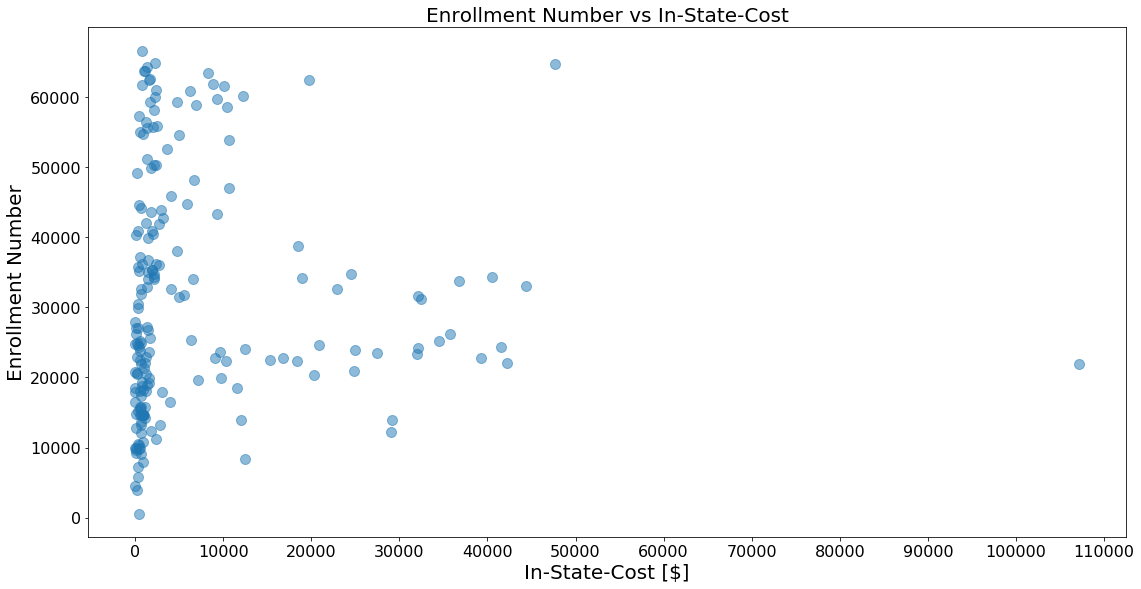

In [81]:
plt.figure(figsize=(16,8))

plt.scatter(data_GY_City['Enroll'],data_GY_City['InStateCost_doller'],marker='o',s=100,alpha=0.5)
plt.ylabel('Enrollment Number', fontsize=20)
plt.xlabel('In-State-Cost [$]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yticks(np.arange(0,70000,10000))
plt.xticks(np.arange(0,120000, 10000))
plt.tight_layout()
plt.title('Enrollment Number vs In-State-Cost', fontsize=20)
plt.show()


**From the above plot, we find that most of the school, the In-State-Cost os lower thatn 20,000 dollers. And we noticed that one point of the In-State-Cost value is close to 110,000 dollers.**